In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
np.random.seed(0)

# Parametry
mean_ppm = 25.0
mean_ppb = mean_ppm * 1000
dt = 1.0  # časový krok [s]
T_min = 60
N = int(T_min * 60 / dt)

time_s = np.arange(N) * dt
time_min = time_s / 60

# Simulace: A – NDIR (horší šum), B – DFB-QCL (lepší stabilita)
noise_A = np.random.normal(0, 50, N)
drift_A = np.linspace(0, 80, N)
data_A = mean_ppb + noise_A + drift_A

noise_B = np.random.normal(0, 10, N)
drift_B = np.linspace(0, 10, N)
data_B = mean_ppb + noise_B + drift_B


In [3]:
def allan_variance(data, tau_values, dt):
    avar = []
    for tau in tau_values:
        m = int(np.round(tau / dt))
        if m < 1: avar.append(np.nan); continue
        n = len(data) // m
        if n < 2: avar.append(np.nan); continue
        y = np.array([np.mean(data[i*m:(i+1)*m]) for i in range(n)])
        av = 0.5 * np.mean((y[1:] - y[:-1])**2)
        avar.append(av)
    return np.array(avar)

def allan_deviation(data, tau_values, dt):
    return np.sqrt(allan_variance(data, tau_values, dt))

In [4]:
tau_values = np.logspace(0, 3, 40)
adev_A = allan_deviation(data_A, tau_values, dt)
adev_B = allan_deviation(data_B, tau_values, dt)

# Minimum a τ_opt
idx_A = np.nanargmin(adev_A)
tau_opt_A = tau_values[idx_A]
sigma_min_A = adev_A[idx_A]

idx_B = np.nanargmin(adev_B)
tau_opt_B = tau_values[idx_B]
sigma_min_B = adev_B[idx_B]

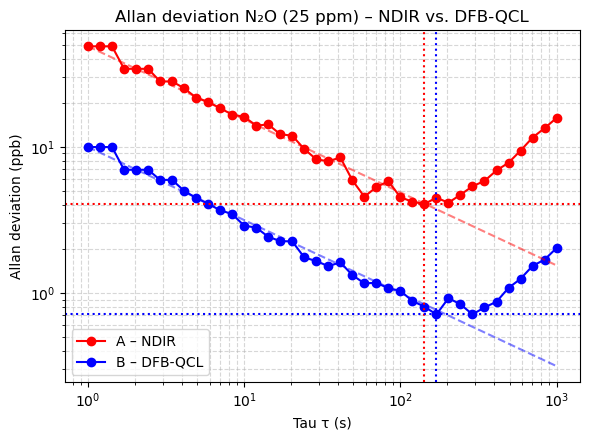

In [5]:
fig, ax = plt.subplots(figsize=(6, 4.5))

ax.loglog(tau_values, adev_A, 'o-', color='red', label='A – NDIR')
ax.loglog(tau_values, adev_B, 'o-', color='blue', label='B – DFB-QCL')

# White noise reference pro každou techniku
wn_A = adev_A[0] * np.sqrt(tau_values[0] / tau_values)
wn_B = adev_B[0] * np.sqrt(tau_values[0] / tau_values)
ax.loglog(tau_values, wn_A, '--', color='red', alpha=0.5)
ax.loglog(tau_values, wn_B, '--', color='blue', alpha=0.5)

# τ_opt a σ_min
ax.axvline(tau_opt_A, ls=':', color='red')
ax.axvline(tau_opt_B, ls=':', color='blue')
ax.axhline(sigma_min_A, ls=':', color='red')
ax.axhline(sigma_min_B, ls=':', color='blue')

ax.set_xlabel('Tau τ (s)')
ax.set_ylabel('Allan deviation (ppb)')
ax.set_title('Allan deviation N₂O (25 ppm) – NDIR vs. DFB-QCL')
ax.grid(True, which='both', ls='--', alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()

C:\Users\venan\AppData\Local\Temp\ipykernel_4484\2896501777.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


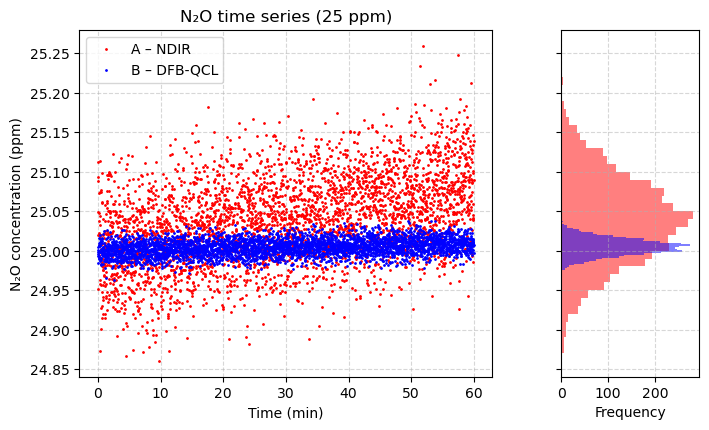

In [9]:
fig = plt.figure(figsize=(8, 4.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1], wspace=0.25)

# Převod dat z ppb na ppm
data_A_ppm = data_A / 1000.0
data_B_ppm = data_B / 1000.0

# Časové průběhy
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(time_min, data_A_ppm, '.', ms=2, color='red', label='A – NDIR')
ax1.plot(time_min, data_B_ppm, '.', ms=2, color='blue', label='B – DFB-QCL')
ax1.set_xlabel('Time (min)')
ax1.set_ylabel('N₂O concentration (ppm)')
ax1.set_title('N₂O time series (25 ppm)')
ax1.grid(True, ls='--', alpha=0.5)
ax1.legend()

# Histogramy
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax2.hist(data_A_ppm, bins=40, orientation='horizontal', color='red', alpha=0.5)
ax2.hist(data_B_ppm, bins=40, orientation='horizontal', color='blue', alpha=0.5)
ax2.set_xlabel('Frequency')
ax2.grid(True, ls='--', alpha=0.5)
plt.setp(ax2.get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()
